<h1 align="center">Markov Chain Monte Carlo for fun and profit</h1>
<h1 align="center"> 🎲 ⛓️ 👉 🧪 </h1>

# Adding Documentation 

References:
- [Intro to basic ReStrutured Text](https://www.sphinx-doc.org/en/master/usage/restructuredtext/basics.html)
- [Getting started with Sphinx](https://www.sphinx-doc.org/en/master/usage/quickstart.html)

If we produce software that might be used by others even colleagues, it's imperative to document how it works and should be used. 

The classic way to do this in the python community is to use a tool called [Sphinx](https://www.sphinx-doc.org/en/master/), you'll probably be quite familiar with pages generated by Sphinx if you've ever used any python packages. To give you teaser by the end of this chapter we will have an autogenerated website for the project that looks like [this](https://recode-mcmcff.readthedocs.io/en/latest/)

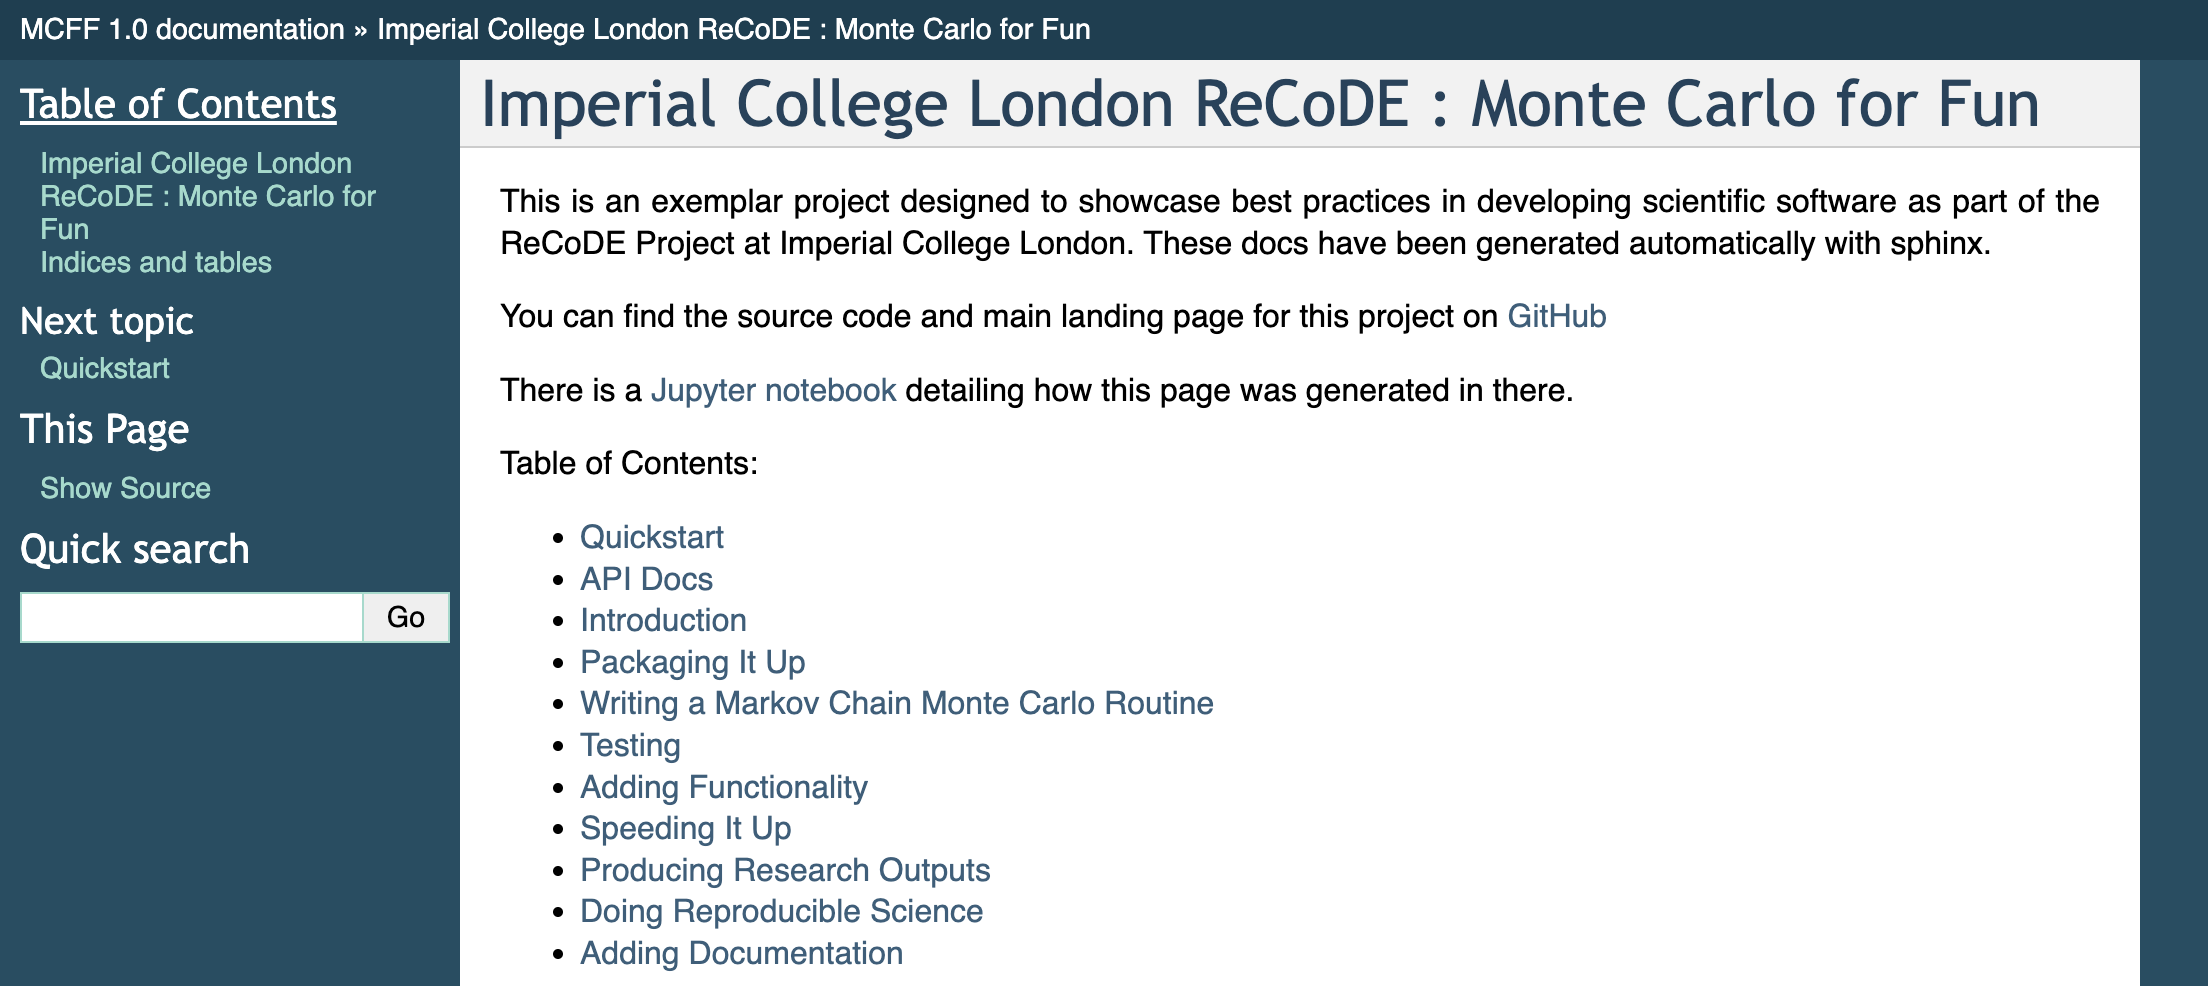

We'll use sphinx along with a couple plugins: [autodoc][autodoc] allows us to generate documentation automatically from the docstrings in our source code, while [napoleon][napoleon] allows us to use [NUMPYDOC][numpydoc] and Google formats for the docstrings in addition to [reStructuredText][rst]

What this means is that we'll be able to write documentation directly into the source code and it will get rendered into a nice website. This helps keep the documentation up to date beause it's right there next to the code!

[autodoc]: https://www.sphinx-doc.org/en/master/usage/extensions/autodoc.html
[napoleon]: https://www.sphinx-doc.org/en/master/usage/extensions/napoleon.html
[NUMPYDOC]: https://numpydoc.readthedocs.io/en/latest/format.html
[googledoc]: https://google.github.io/styleguide/pyguide.html
[rst]: https://docutils.sourceforge.io/rst.html

This means that the part of our source code that looks like: 
    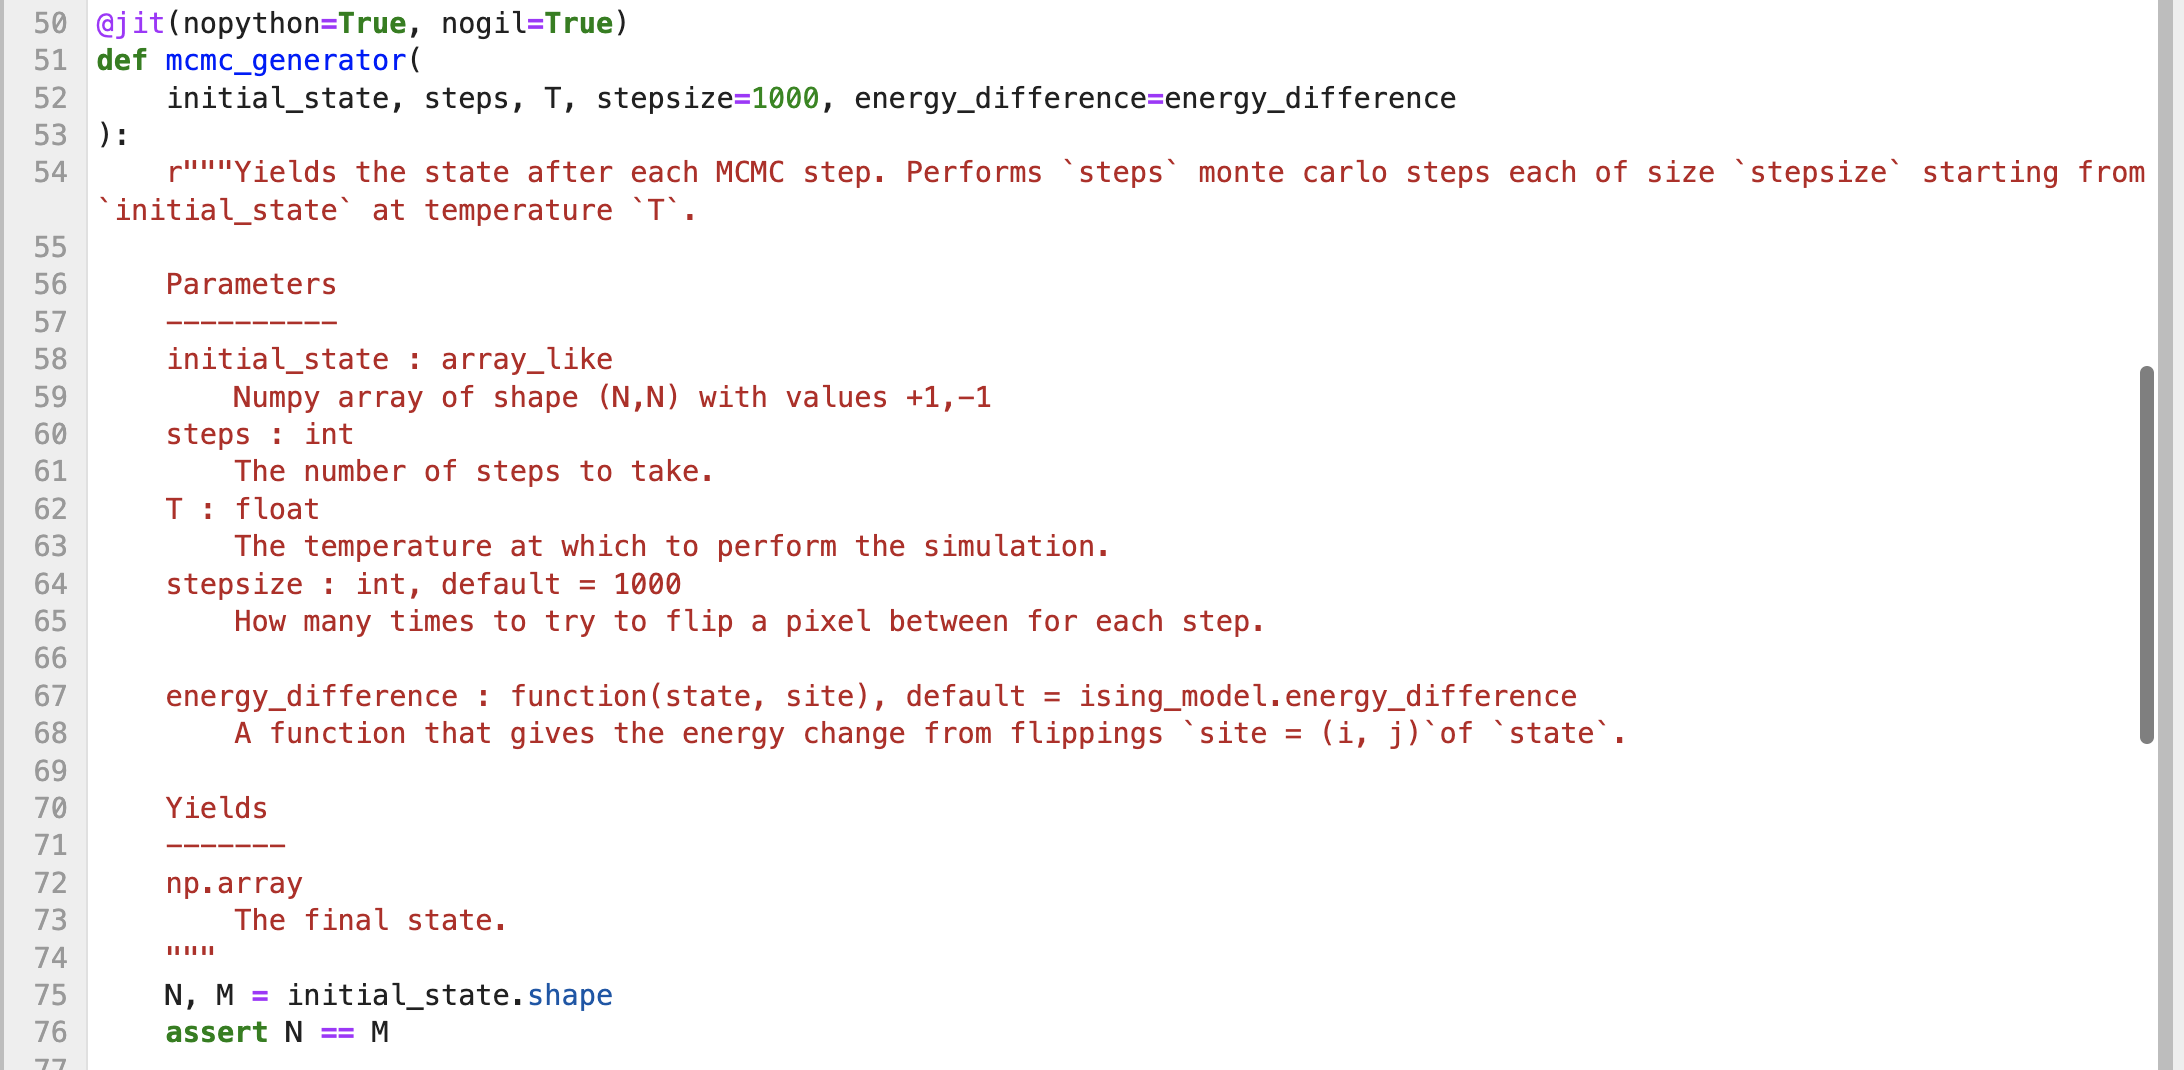
will get rendered to this:
    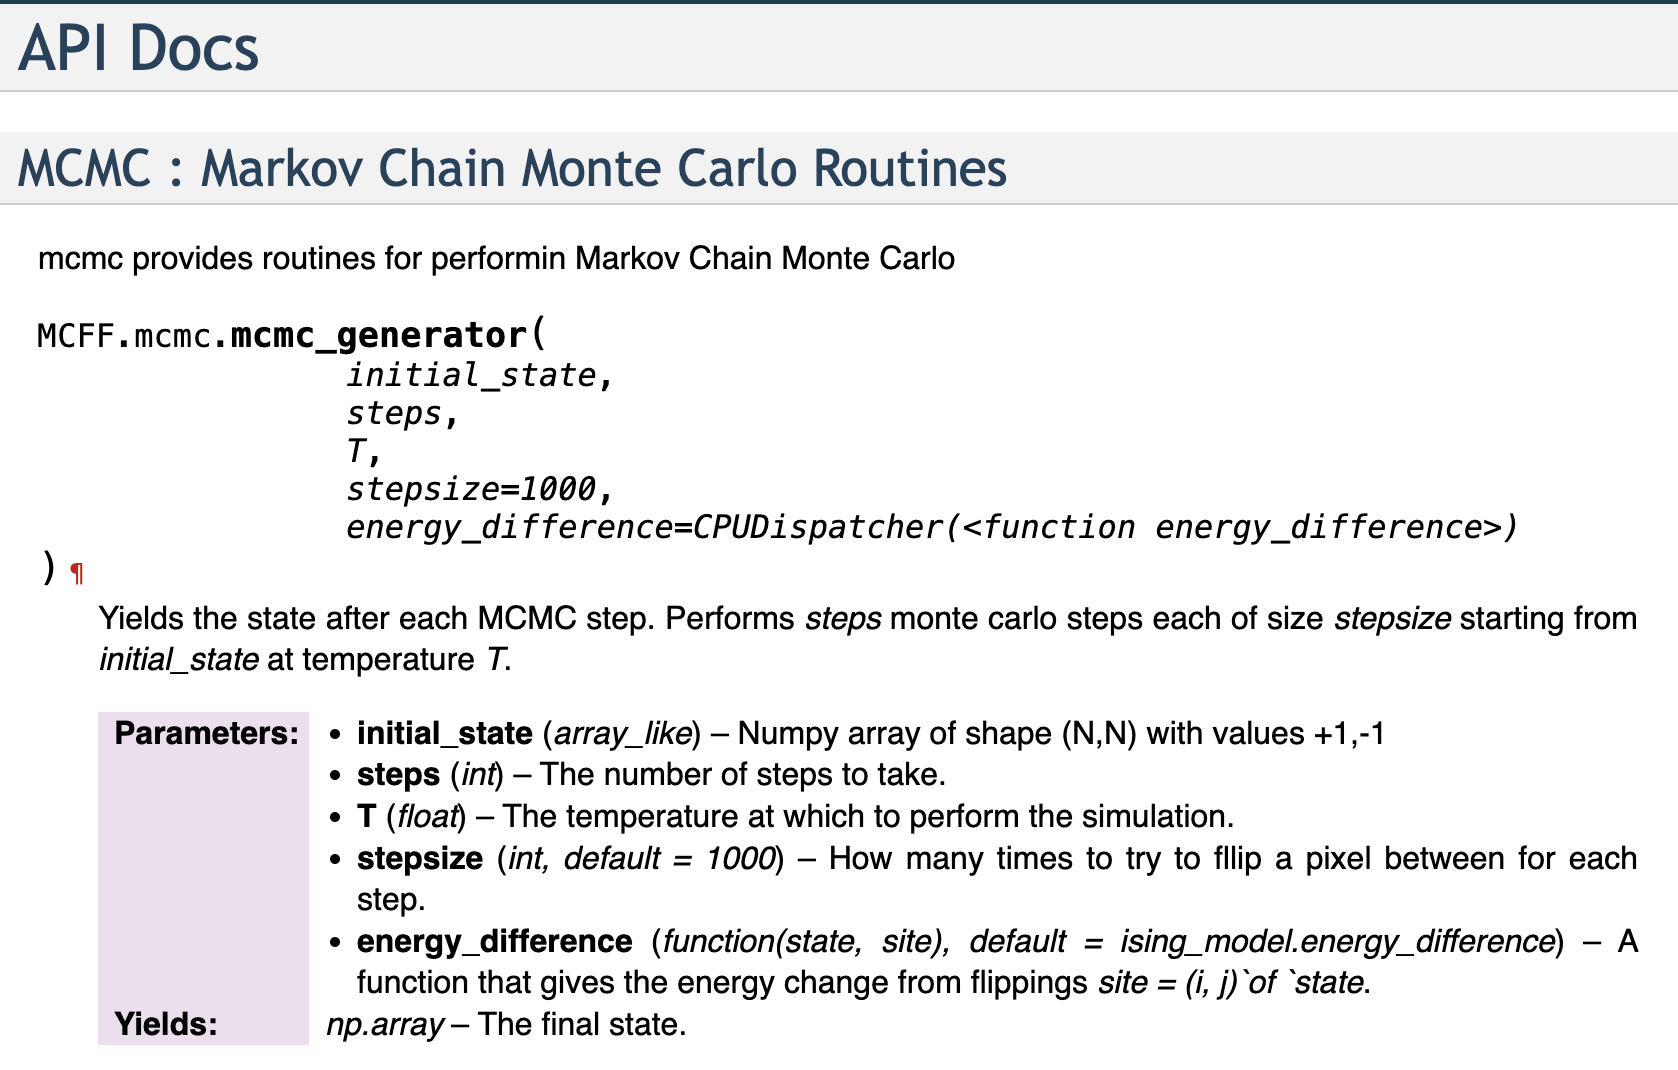

## Installation

Make sure sphinx is installed in the environment then make a folder called `docs/`, cd into it and run sphinx
```sh
% mkdir docs
% cd docs
% sphinx-quickstart #just go with the defaults
```

This will populate `docs` with a skeleton sphinx project, to tell sphinx where to find our code we'll add some lines to `conf.py`:
```python
import os
import sys
sys.path.insert(0, os.path.abspath('../src'))
#since conf.py is in docs/ the path ../src points to where our module is
```

We add the extensions by adding this to `conf.py` too:
```python
extensions = [
    'sphinx.ext.autodoc',
    'sphinx.ext.napoleon',
]
```

## Writing docstrings
Numpy style docstrings look like this:

```python
def func(arg1, arg2):
    """Summary line.

    Extended description of function.

    Parameters
    ----------
    arg1 : int
        Description of arg1
    arg2 : str
        Description of arg2

    Returns
    -------
    bool
        Description of return value

    """
    return True
```

I normally just copy paste this and go from there but there's a full description [here](NUMPYDOC). You can also check out the docstrings in MCFF

[NUMPYDOC]: https://numpydoc.readthedocs.io/en/latest/format.html

## Making the function declarations a bit nicer
Longer function names in the generated documentation currently generate with no line break, I found a fix for that buried [inside a bug report on sphinx](https://github.com/sphinx-doc/sphinx/issues/1514#issuecomment-742703082) 

It involves adding some custom css and an extra line to `conf.py`:
```python
html_css_files = [
    'custom.css',
]
```

Finally we add a `readthedocs.yaml` file (which you can copy from the root of this repo) to tell readthedocs how to build our documentation. https://docs.readthedocs.io/en/stable/config-file/v2.html#packages

And the documentation is now hosted [online!](https://recode-mcmcff.readthedocs.io/en/latest/#)

### Documentation Ideas

Readthedocs can be a bit tricky to setup, it is also possible to use Github pages to acomplish something similar. Another idea is to include some simple copyable code snippets in a quickstart guide. This lets people get up and running your code more quickly than is they need to read the API docs to understand how to interact with your module.